In [1]:
%matplotlib inline

In [2]:
# Copyright (c) 2022 MetPy Developers.
# Distributed under the terms of the BSD 3-Clause License.
# SPDX-License-Identifier: BSD-3-Clause

# Equivalent Potential Temperature

Use functions from `metpy.calc` as well as pint's unit support to perform calculations.

The code below uses example data from our test suite to calculate the equivalent potential
temperature over the provided sounding data and plots the values up to 300-hPa.

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

from metpy.calc import equivalent_potential_temperature
from metpy.cbook import get_test_data
from metpy.units import units

Upper air data can be obtained using the siphon package, but for this example we will use
some of MetPy's sample data.

In [4]:
# Set column names
col_names = ['pressure', 'height', 'temperature', 'dewpoint', 'direction', 'speed']

# Read in test data using col_names
df = pd.read_fwf(get_test_data('jan20_sounding.txt', as_file_obj=False),
                 skiprows=5, usecols=[0, 1, 2, 3, 6, 7], names=col_names)

Drop any rows with all NaN values for T, Td, winds

In [5]:
df = df.dropna(subset=('temperature', 'dewpoint', 'direction', 'speed'
                       ), how='all').reset_index(drop=True)

Isolate pressure, temperature, dewpoint, and height and add units

In [6]:
p = df['pressure'].values * units.hPa
T = df['temperature'].values * units.degC
Td = df['dewpoint'].values * units.degC
h = df['height'].values * units.meter

Calculate the equivalent potential temperature for the whole sounding

In [7]:
theta_e = equivalent_potential_temperature(p, T, Td)

Define a layer with pressure greater than 300 hPa

In [8]:
layer = p > 300 * units.hPa

Use the layer defined above and plot the equivalent potential temperature

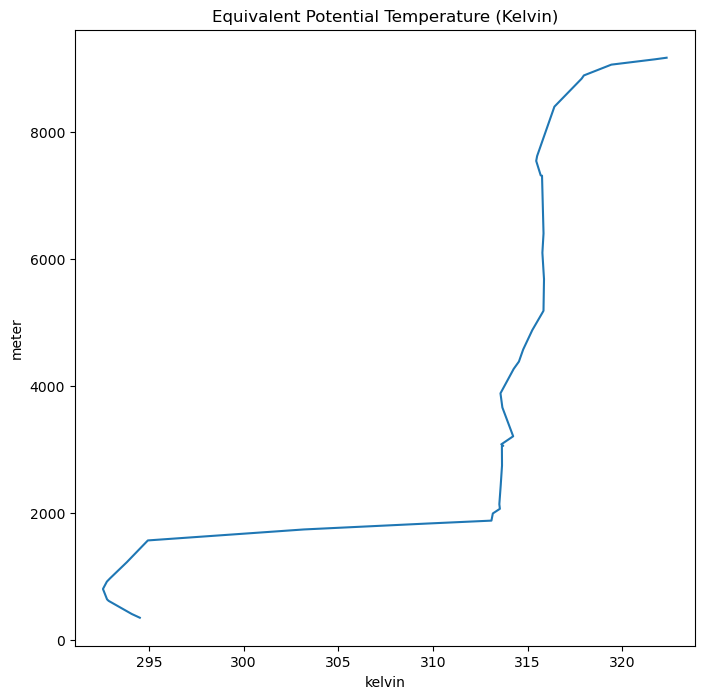

In [9]:
plt.figure(figsize=(8, 8))
plt.plot(theta_e[layer], h[layer])
plt.title('Equivalent Potential Temperature (Kelvin)')
plt.show()